<h3 style = "color:blue;"> ECG Signal Filtering </h3>

<p> 1. high-pass filters </p>
<p> 2. low-pass filters </p>
<p> 3. notch filters </p>
<p> 4. bandpass filters </p>
<p> 5. median filters </p>
<p> 6. Savitsky-Golay filters </p>
<p> 7. adaptive filters </p>

In [45]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, savgol_filter, medfilt

In [46]:
data_dir = r'D:\Projects\Sem5\Model\Data\Signals'
record_names = [f'{i:03d}' for i in range(100, 235)]
existing_records = [i for i in record_names if f'{i}_signal.csv' in os.listdir(data_dir)]

In [47]:
file_path = os.path.join(data_dir, f'{existing_records[0]}_signal.csv')
signal_df = pd.read_csv(file_path)

signal_0 = signal_df['signal_0']
signal_1 = signal_df['signal_1']
time = signal_df['time']

In [48]:
fs=360

In [75]:
def butter_filter(data, cutoff, fs, btype='low', order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

In [76]:
filtered_signal_0_butter = butter_filter(signal_0, cutoff=0.5, fs=fs, btype='high')

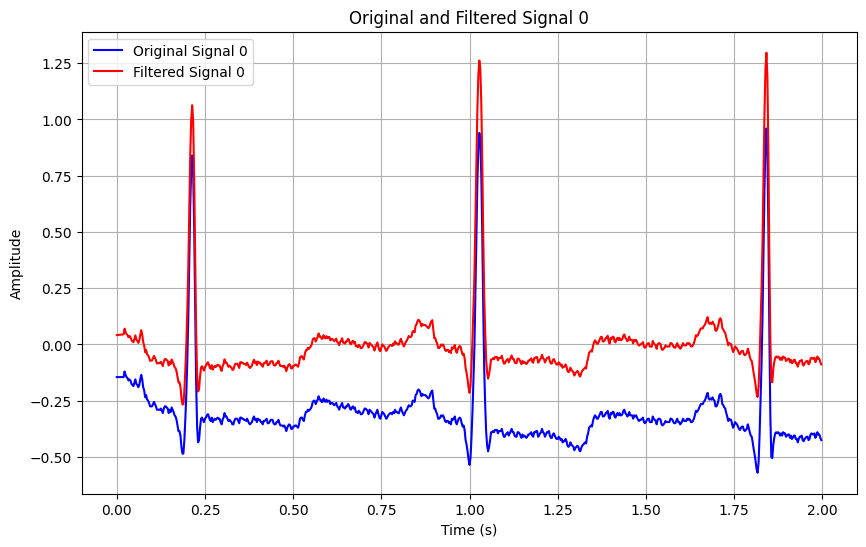

In [77]:
max_time = 2
time_limited = time[time < max_time]
signal_0_limited = signal_0[time < max_time]
filtered_signal_0_limited = filtered_signal_0_butter[time < max_time]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_limited, signal_0_limited, label='Original Signal 0', color='blue')
plt.plot(time_limited, filtered_signal_0_limited, label='Filtered Signal 0', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original and Filtered Signal 0')
plt.legend()
plt.grid(True)
plt.show()



In [79]:
filtered_signal = butter_filter(signal_0, cutoff=0.5, fs=fs, btype='high')

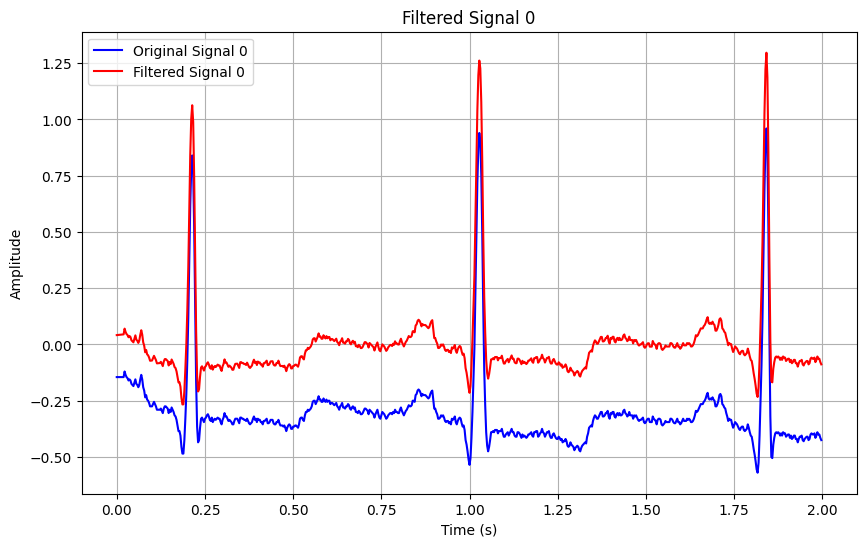

In [80]:
max_time = 2
time_limited = time[time < max_time]
signal_0_limited = signal_0[time < max_time]
filtered_signal_0_limited = filtered_signal_0_butter[time < max_time]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_limited, signal_0_limited, label='Original Signal 0', color='blue')
plt.plot(time_limited, filtered_signal_0_limited, label='Filtered Signal 0', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal 0')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
def butter_filter(data, cutoff, fs, btype='low', order=5):
    nyquist = 0.5 * fs
    
    # Check if cutoff is a list (indicating bandpass or bandstop filter)
    if isinstance(cutoff, list):
        normal_cutoff = [freq / nyquist for freq in cutoff]
    else:
        normal_cutoff = cutoff / nyquist
    
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    filtered_data = filtfilt(b, a, data)
    
    return filtered_data


In [91]:
bp_filtered_signal = butter_filter(signal_0, cutoff=[0.5, 50], fs=fs, btype='band')

In [94]:
signal_0

0        -0.145
1        -0.145
2        -0.145
3        -0.145
4        -0.145
          ...  
649995   -0.075
649996   -0.445
649997   -0.675
649998   -0.765
649999   -1.280
Name: signal_0, Length: 650000, dtype: float64

In [93]:
bp_filtered_signal

array([0.00404355, 0.00436195, 0.00453988, ..., 0.62180204, 0.33531154,
       0.06815642])

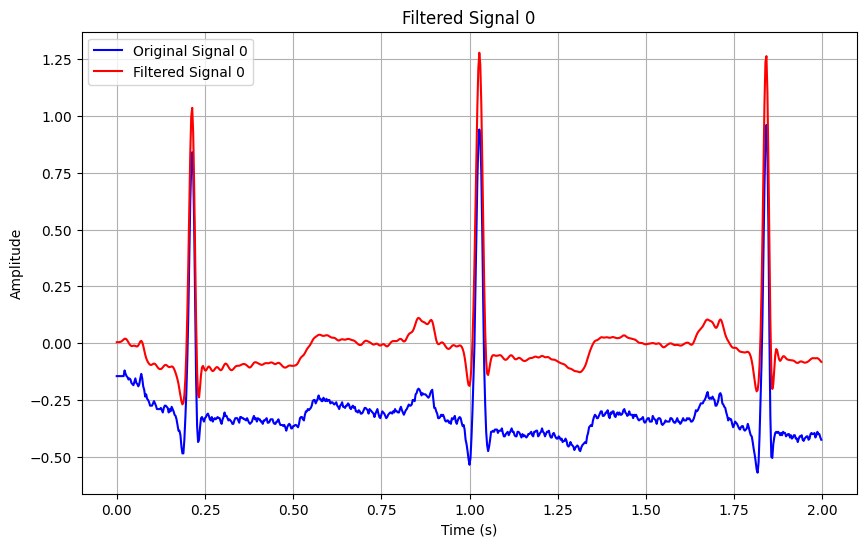

In [92]:
max_time = 2
time_limited = time[time < max_time]
signal_0_limited = signal_0[time < max_time]
filtered_signal_0_limited = bp_filtered_signal[time < max_time]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_limited, signal_0_limited, label='Original Signal 0', color='blue')
plt.plot(time_limited, filtered_signal_0_limited, label='Filtered Signal 0', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal 0')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
def median_filter(data, kernel_size):
    return medfilt(data, kernel_size=kernel_size)


In [68]:
med_filtered_signal = median_filter(signal_0, kernel_size=3)

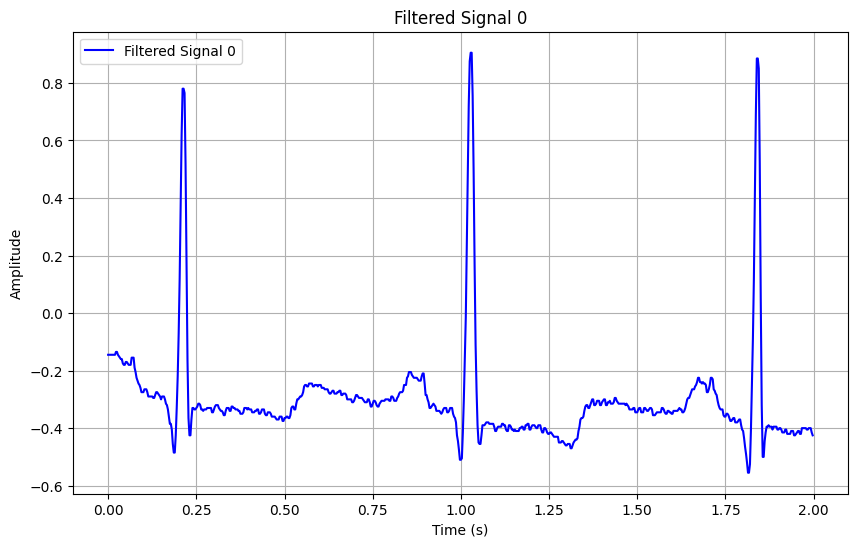

In [69]:
max_time = 2
filtered_signal_0 = med_filtered_signal[time < max_time]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time[time < max_time], filtered_signal_0, label='Filtered Signal 0', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal 0')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
def savgol_filter(data, window_length, polyorder):
    return savgol_filter(data, window_length, polyorder)


In [ ]:
def original_ecg_signal(data_dir , file_path):
    signal_csv_path = os.path.join(data_dir, file_path)
    signal_df = pd.read_csv(signal_csv_path)

    max_time = 2
    signal_df  = signal_df[signal_df['time'] < max_time]

    plt.figure(figsize=(10, 6))

    # Plot each signal column except 'time'
    for column in signal_df.columns:
        if column != 'time':
            plt.plot(signal_df['time'], signal_df[column], label=column)

    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('{} ECG Signal'.format(file_path.split('_')[0]))
    plt.legend()
    plt.show()

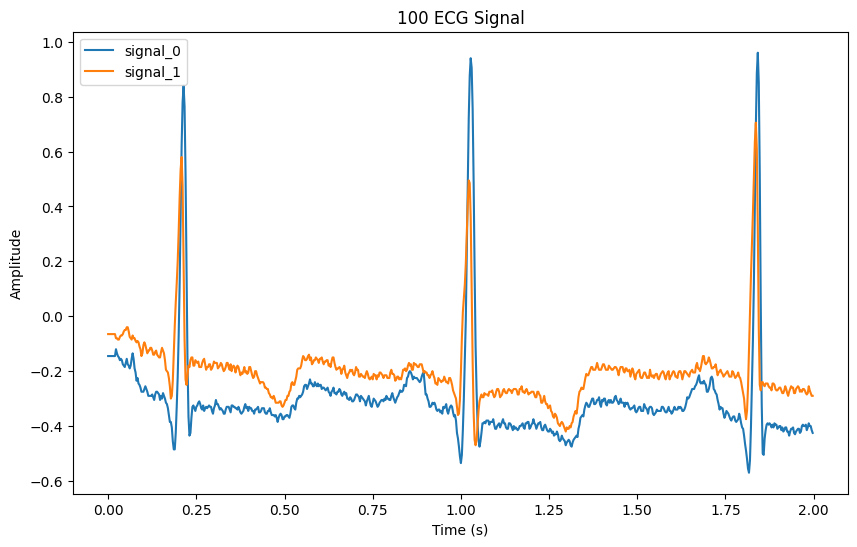

In [ ]:
original_ecg_signal(data_dir, f'{existing_records[0]}_signal.csv')